In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (47.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
import pandas as pd
import numpy as np

# 통계분석 패키지
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest #비율검정

from scipy.stats import shapiro # 샤피로=윌크 검정
from scipy.stats import chi2_contingency #카이제곱검정
from statsmodels.stats.anova import anova_lm # ANOVA


#데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#font
matplotlib.rc('axes',unicode_minus=False)
plt.rc('font',family='NanumGothic')
plt.rcParams["font.family"] = 'NanumGothicCoding'
matplotlib.rc("font",family="NanumGothic")
plt.rc('font', family='NanumBarunGothic') 

#ols : 최소자승법
from statsmodels.formula.api import ols
#선형모델 formula (y~ X1+X2 ...)
import statsmodels.formula.api as smf 
from statsmodels.tools.eval_measures import rmse
from statsmodels.api import qqplot, add_constant
import statsmodels.api as sm
# 여기서는 정규성과 등분산, 독립성을 그래프로 판단함

#모델평가
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
#로지스틱 회귀
from statsmodels.api import Logit

#rmse(없어서 다시 만듦)
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [ ]:
# sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

#sklearn.tree+export_graphviz
from sklearn.tree import export_graphviz
import graphviz

#Over sampling

from imblearn.over_sampling import SMOTE
#grid search
from sklearn.model_selection import GridSearchCV
#XGBoost
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

In [ ]:
book=pd.read_csv("/content/drive/MyDrive/Booking_data_version2.csv")


#cook

In [ ]:
cook=pd.read_csv("/content/drive/MyDrive/cookingdata_version6.csv",encoding='euc-kr')
cook.rename(columns = {'불량여부':'불량'},inplace=True)
cook.rename(columns = {'발생시간파생':'오류발생시각'},inplace=True)
cook.head()

,순번,생산라인코드,생산라인명,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,...,생산시간,생산일자,불량,발생시간,오류발생시각,종료시간,오류조치시간,비가동코드,Error_Message,오류발생작업장명
0,3,C001,쿠커 #1,23K01312,서비스면양념장(재),W003,71.669853,96.769853,131.742003,23.315,...,70.37,2021-01-03,양품,0,0,0,0.0,0,0,0
1,1,C002,쿠커 #2,23V00019,고구마샐러드믹스베이스(재),W003,70.386480,102.086480,136.926080,23.226,...,70.83,2021-01-03,양품,0,0,0,0.0,0,0,0
2,13,C003,쿠커 #3,1.#JE+00,이마트가쓰오다시국물(재),W003,71.206130,112.306130,147.579680,23.516,...,73.55,2021-01-03,양품,0,0,0,0.0,0,0,0
3,7,C005,2동 쿠커 #4,26A01006,고구마샐러드바145g(재),W003,70.430565,96.030565,131.569165,23.692,...,74.81,2021-01-03,양품,0,0,0,0.0,0,0,0
4,2,C007,프리머 #1,26B06024,이츠웰골드마요네즈1kg(재),W003,72.179318,114.079318,149.928068,23.899,...,73.40,2021-01-03,양품,0,0,0,0.0,0,0,0


In [ ]:
def func1(row):
    if pd.isnull(row):
        return row
    
    if '소스' in row:
        return 'sauce'
    elif '드레싱' in row :
        return 'sauce'
    elif '마요' in row :
        return 'sauce'
    elif '밥' in row :
        return 'rice'
    elif '비빔밥' in row :
        return 'rice'
    elif '볶음밥' in row :
        return 'rice'
    elif '도시락' in row:
        return '도시락'
    elif '샐러드' in row:
        return 'salad'
    elif '베이스' in row:
        return 'soup'
    elif '국물' in row:
        return 'soup'
    elif '양념' in row:
        return 'sauce'
    elif '허브' in row:
        return 'sauce'
    elif '디핑' in row:
        return 'sauce'  
    elif '이마트 야채케' in row:
        return 'sauce'  
    elif '케찹' in row:
        return 'sauce'
    elif '참치액' in row:
        return 'sauce'  
    elif '시럽' in row:
        return 'sauce'  
    elif '머스타드' in row:
        return 'sauce'  
    elif '에이드' in row:
        return 'drink'
    elif '머스타드' in row:
        return 'sauce'
    elif '요리당' in row:
        return 'sauce'
    elif '멸치' in row:
        return 'soup'
    elif '감자무스' in row:
        return 'salad'
    elif '머스타드' in row:
        return 'sauce'
    elif '사골' in row:
        return 'soup'
    elif '사이다' in row:
        return 'drink'
    elif '쉐프메이드' in row:
        return 'sauce'
    elif '사골' in row:
        return 'soup'
    elif '사우전아일랜드' in row:
        return 'sauce'
    elif '데미그라스' in row:
        return 'sauce'
    elif '육수' in row:
        return 'soup'
    elif 'SAUCE' in row:
        return 'sauce'
    elif '다시' in row:
        return 'soup'
    elif '수프' in row:
        return 'soup'
    elif '초고추장' in row:
        return 'sauce'
    elif '리조또' in row:
        return 'rice'
    elif '깔라만시' in row:
        return 'sauce'
    elif '케첩' in row:
        return 'sauce'
    elif '죽' in row:
        return 'soup'
    elif '데리야끼' in row:
        return 'sauce'
    
cook['구분'] = cook['품목명'].apply(func1)

In [ ]:
cook['불량'] = cook['불량'].replace('불량', 1).replace('양품', 0)

len_p1=cook.groupby('구분')['구분'].count()
len_p1=pd.DataFrame(len_p1)
len_p1.rename(columns={'구분':'개수'},inplace=True)
len_p1.reset_index(inplace=True)
len_p1

sum_=sum(len_p1['개수'])
len_p1['각품목의생산비율']=len_p1['개수']/sum_

## salad 항목이 불량 비율이 가장 높다.


In [ ]:
len_p1

,구분,개수,각품목의생산비율
0,drink,35,0.001510
1,rice,9550,0.412029
2,salad,1093,0.047157
3,sauce,11625,0.501553
4,soup,875,0.037751


## 전체 생산건수중의 해당 품목의 "생산 비율" 보기  
소스: 0.501553  
rice :0.412029

# 전체 불량건수중에서 소스랑 라이스가 차지하는 비율보기



In [ ]:
p1 = cook.pivot_table(index='구분' , values= '불량', aggfunc='sum').reset_index()
p1['비율'] = p1['불량'] / len_p1['개수']
p1

,구분,불량,비율
0,drink,2,0.057143
1,rice,428,0.044817
2,salad,53,0.048490
3,sauce,519,0.044645
4,soup,37,0.042286


In [ ]:
#전체불량갯수중에 각 구분별 불량률 = 비율_전체불량개수
sum_all=sum(p1['불량'])
sum_all

p1['비율_전체불량개수']=p1['불량']/sum_all

p1

,구분,불량,비율,비율_전체불량개수
0,drink,2,0.057143,0.001925
1,rice,428,0.044817,0.411935
2,salad,53,0.048490,0.051011
3,sauce,519,0.044645,0.499519
4,soup,37,0.042286,0.035611


# 전체 불량 건수중의 품목별로 얼마나 불량비율을 차지하는지  
전체불량중 소스가 차지하는 불량 비율: 0.499519  
전체불량중 rice가 차지하는 불량 비율: 0.411935

# rice EDA

## decook=rice & 불량 data

In [ ]:
ncook = cook[['구분','품목명','생산일자','충전실온도','실링온도','실링압력','쿠킹온도','쿠킹스팀압력','불량','오류발생시각','오류조치시간','Error_Message','오류발생작업장명']]
ncook.head()

,구분,품목명,생산일자,충전실온도,실링온도,실링압력,쿠킹온도,쿠킹스팀압력,불량,오류발생시각,오류조치시간,Error_Message,오류발생작업장명
0,sauce,서비스면양념장(재),2021-01-03,71.669853,96.769853,201.844,131.742003,23.315,0,0,0.0,0,0
1,salad,고구마샐러드믹스베이스(재),2021-01-03,70.386480,102.086480,212.043,136.926080,23.226,0,0,0.0,0,0
2,soup,이마트가쓰오다시국물(재),2021-01-03,71.206130,112.306130,208.781,147.579680,23.516,0,0,0.0,0,0
3,salad,고구마샐러드바145g(재),2021-01-03,70.430565,96.030565,208.269,131.569165,23.692,0,0,0.0,0,0
4,sauce,이츠웰골드마요네즈1kg(재),2021-01-03,72.179318,114.079318,211.625,149.928068,23.899,0,0,0.0,0,0


## rice 품목별 쿠킹온도, 실링온도, 

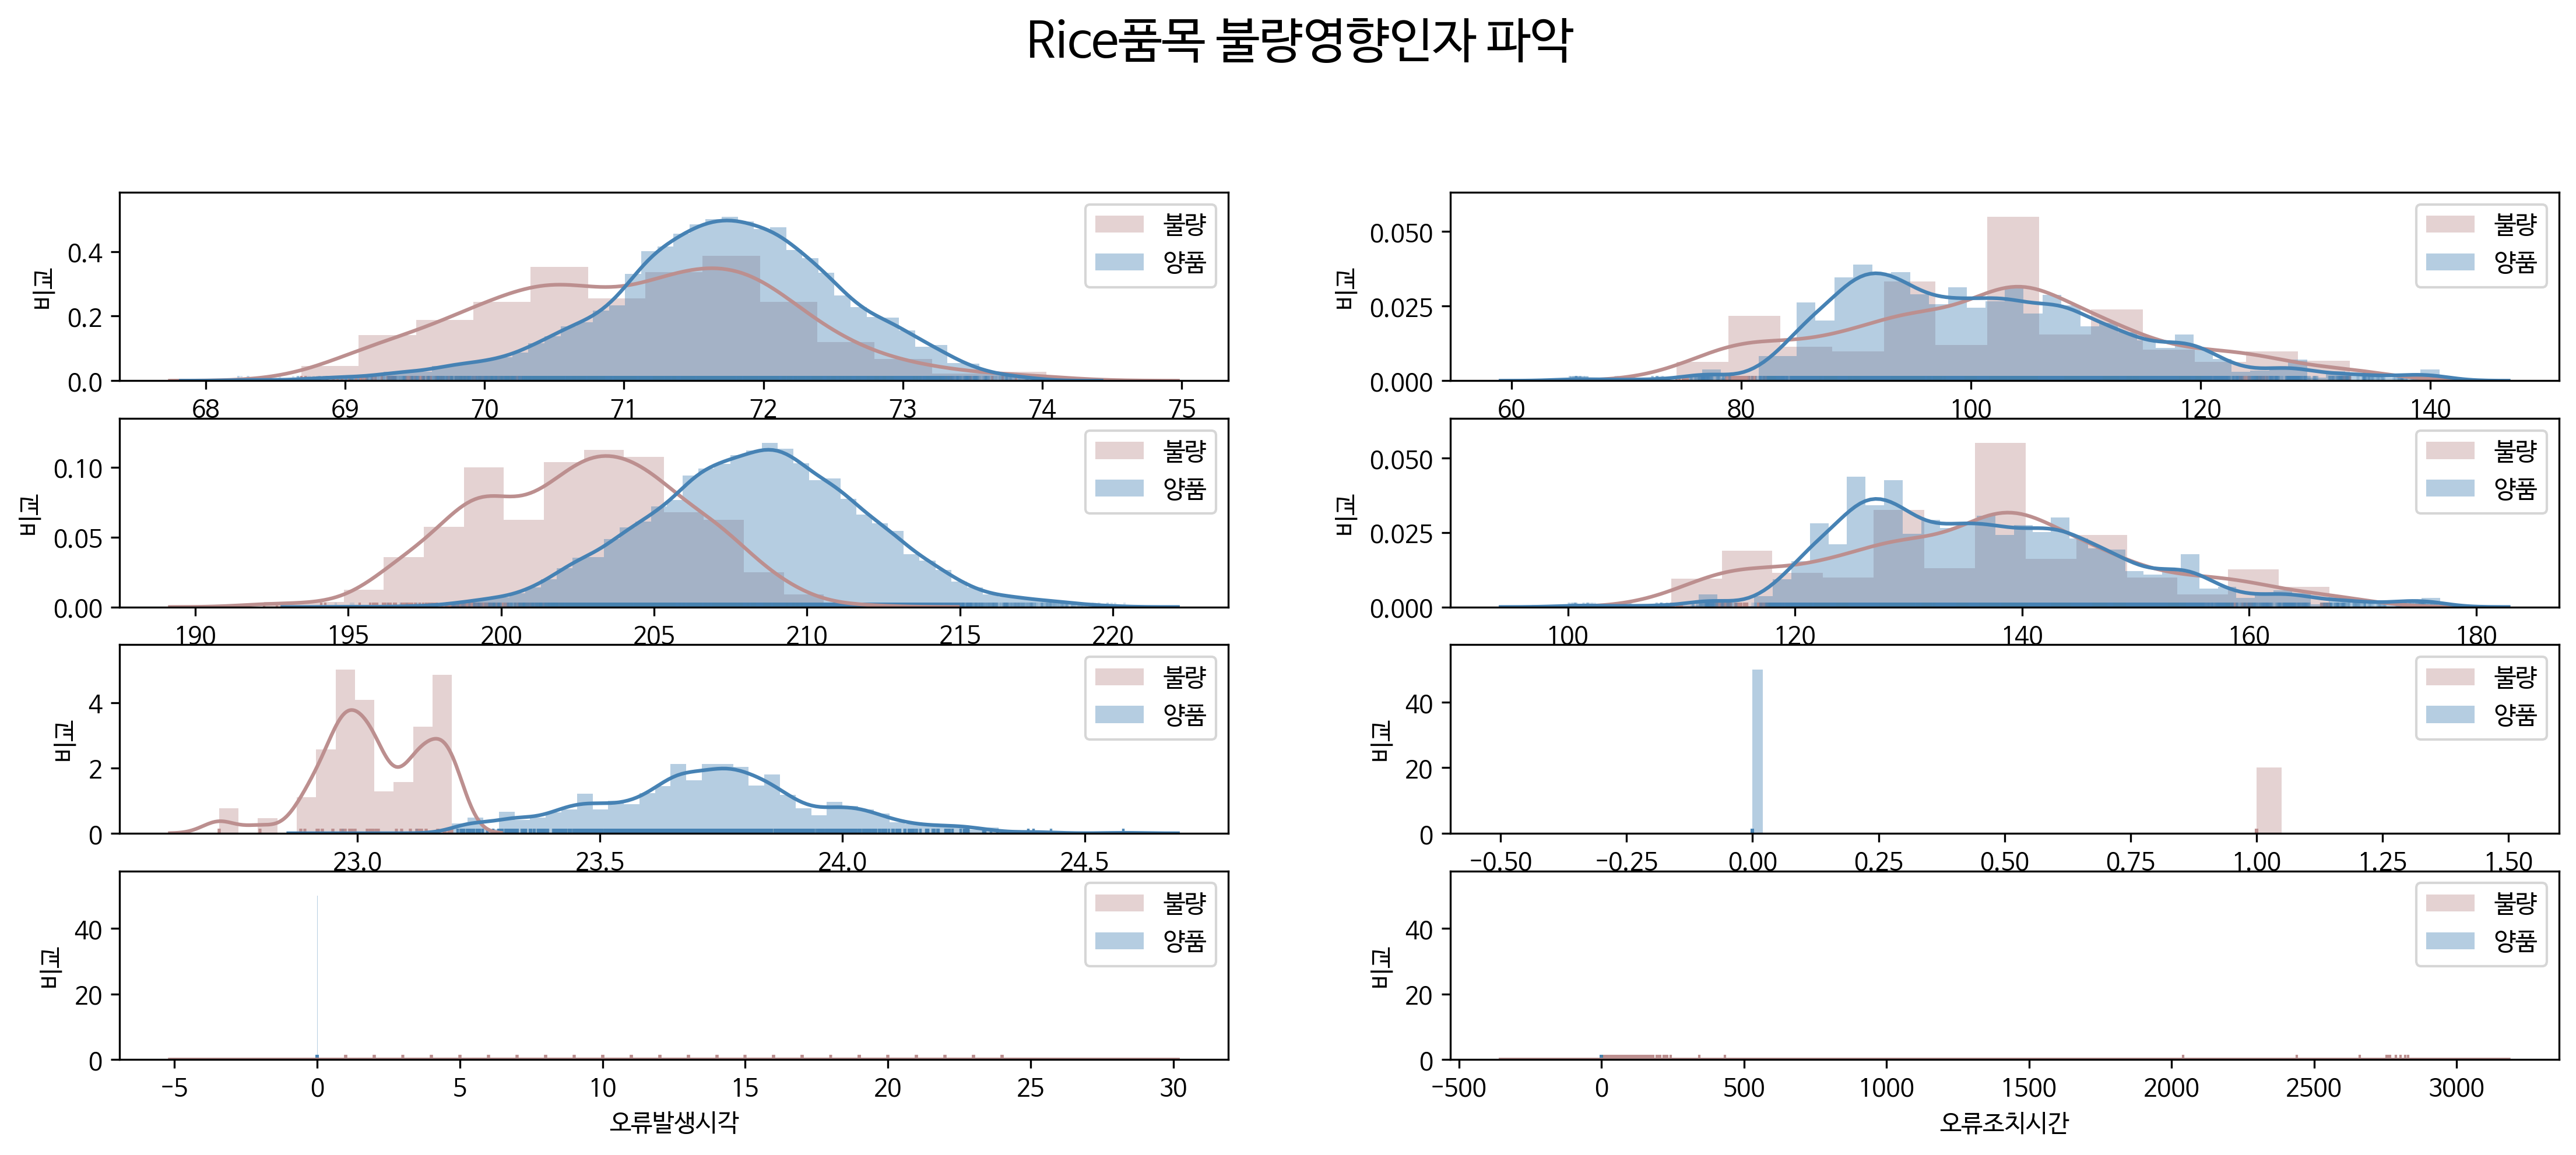

In [ ]:
ncook = ncook[ncook['구분'] == 'rice']
decook = ncook[ncook['불량'] == 1]
decook


df_numeric = ncook.select_dtypes(exclude = 'object')
df_numeric_x = df_numeric.drop("불량", axis = 1)
df_numeric_y = df_numeric["불량"]
df_numeric_x.head()

i = 0
columns = df_numeric.columns
palette = sns.color_palette('Paired',9)

fig = plt.figure(figsize = (18, 10),dpi=300)

for col in df_numeric.columns: 
    plt.subplot(ncook.shape[1]//2, 2, i+1)
    i += 1
    sns.distplot(ncook[ncook["불량"] == 1][col], label = "불량", color='rosybrown',kde=True,rug=True,rug_kws={'alpha':1})
    sns.distplot(ncook[ncook["불량"] == 0][col], label = "양품",color='steelblue',kde=True,rug=True,rug_kws={'alpha':0.2})

        #font
    matplotlib.rc('axes',unicode_minus=False)
    plt.rc('font',family='NanumGothic')
    plt.rcParams["font.family"] = 'NanumGothicCoding'
    matplotlib.rc("font",family="NanumGothic")
    plt.rc('font', family='NanumBarunGothic') 

    
    plt.xlabel(col)
    plt.ylabel("비교")
    plt.legend()
    plt.suptitle('Rice품목 불량영향인자 파악',fontsize=20)
plt.show()

## 오류발생작업장-->공정별로 항목 이름 바꿀지말지 논의!  
일단 여기에서는 오류발생작업장명으로 진행

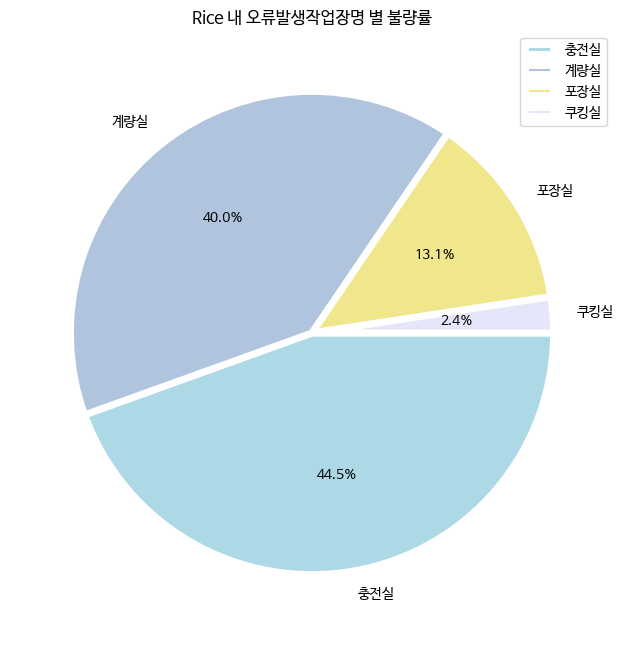

In [ ]:
dfcount = decook.groupby("오류발생작업장명", as_index = False).agg("count")
labels = dfcount["오류발생작업장명"]
colors = ['lightblue', 'lightsteelblue','khaki','lavender']
 

labels = ['충전실','계량실','포장실','쿠킹실',] ## 라벨
frequency = [44.5,40,13.1,2.4] ## 빈도
wedgeprops={'width': 1, 'edgecolor': 'w', 'linewidth': 5}

fig = plt.figure(figsize=(15,8),dpi=100) 
fig.set_facecolor('white') 
ax = fig.add_subplot()
 
pie = ax.pie(frequency,
       counterclock=False, 
       autopct=lambda p : '{:.1f}%'.format(p),
       colors =colors,
       wedgeprops=wedgeprops,
       labels=labels
       )
 
plt.legend(pie[0],labels) 
plt.title('Rice 내 오류발생작업장명 별 불량률')
plt.show()

## rice품목은 충전실(충전공정)에서 가장 많이 불량 발생

## 요일변환

In [ ]:
from datetime import datetime
ncook['생산일자'] = ncook['생산일자'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d'))
ncook.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9550 entries, 2404 to 23970
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   구분             9550 non-null   object        
 1   품목명            9550 non-null   object        
 2   생산일자           9550 non-null   datetime64[ns]
 3   충전실온도          9550 non-null   float64       
 4   실링온도           9550 non-null   float64       
 5   실링압력           9550 non-null   float64       
 6   쿠킹온도           9550 non-null   float64       
 7   쿠킹스팀압력         9550 non-null   float64       
 8   불량             9550 non-null   int64         
 9   오류발생시각         9550 non-null   int64         
 10  오류조치시간         9550 non-null   float64       
 11  Error_Message  9550 non-null   object        
 12  오류발생작업장명       9550 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 1.0+ MB


In [ ]:
ncook['day'] = ncook['생산일자'].dt.dayofweek # 요일 칼럼
ncook['day']

def index_to_string(x):
    if x==6:
        return 'Sunday'
    if x==0:
        return 'Monday'
    if x==1:
        return 'Tuesday'
    if x==2:
        return 'Wendsday'
    if x==3:
        return 'Thursday'
    if x==4:
        return 'Friday'
    if x==5:
        return 'Saturday'

data_=ncook.groupby(by='day')['day'].count()
data_=pd.DataFrame(data_)

data_.rename(columns = {'day':'rice생산개수'},inplace=True)

data_=data_.reset_index()

data_=data_.sort_values("day")

data_['day']=data_.apply(lambda x:index_to_string(x['day']),axis=1)
data_

,day,rice생산개수
0,Monday,729
1,Tuesday,1789
2,Wendsday,1996
3,Thursday,2182
4,Friday,1955
5,Saturday,833
6,Sunday,66


In [ ]:
data_x=ncook[ncook['불량']==1]
data_x=data_x.groupby(by='day')['불량'].count()
data_x=pd.DataFrame(data_x)

data_x.rename(columns = {'불량':'rice불량개수'},inplace=True)

data_x=data_x.reset_index()

data_x=data_x.sort_values("day")

data_x['day']=data_x.apply(lambda x:index_to_string(x['day']),axis=1)
data_x
#data_['rice불량개수']=

,day,rice불량개수
0,Monday,24
1,Tuesday,80
2,Wendsday,98
3,Thursday,90
4,Friday,94
5,Saturday,40
6,Sunday,2


In [ ]:
data=pd.concat([data_,data_x],axis=1)
data

,day,rice생산개수,day,rice불량개수
0,Monday,729,Monday,24
1,Tuesday,1789,Tuesday,80
2,Wendsday,1996,Wendsday,98
3,Thursday,2182,Thursday,90
4,Friday,1955,Friday,94
5,Saturday,833,Saturday,40
6,Sunday,66,Sunday,2


## 오류발생시각

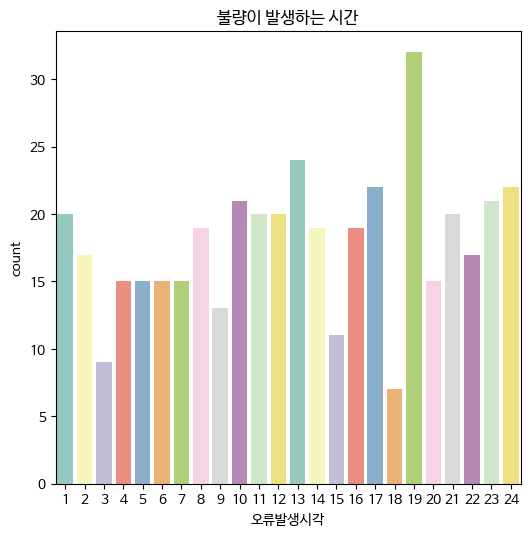

In [ ]:
palette = sns.color_palette('Paired',9)
fig, ax = plt.subplots(figsize = (6,6),dpi=100)
plt.title('불량이 발생하는 시간')
sns.countplot(decook['오류발생시각'],palette='Set3')

In [ ]:
#오류발생시각 table

x=decook.groupby('오류발생시각')['불량'].count()
x=pd.DataFrame(x)
x

,불량
오류발생시각,
1,20
2,17
3,9
4,15
5,15
6,15
7,15
8,19
9,13


# 에러메세지

In [ ]:
x=decook.groupby(['구분','Error_Message'])['Error_Message'].count()
x.index = x.index.set_names(['구분', 'Error_Message_'])
x=pd.DataFrame(x).reset_index()
x=x.sort_values(by='Error_Message',ascending=False)
x

,구분,Error_Message_,Error_Message
2,rice,공정 과부하,315
12,rice,장비 오염,56
14,rice,충진 오류,20
5,rice,기타,10
6,rice,별도구작업,9
7,rice,볶음,7
11,rice,원료,2
0,rice,PSD패킹 교체,1
1,rice,QA 규격 오류,1
3,rice,구동부 이상,1


## 모델링



## oversampling- SMOTE

In [ ]:
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE

### 변수변환(더미화+scale)

In [ ]:
cook.head()

,순번,생산라인코드,생산라인명,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,생산일자,불량,발생시간,오류발생시각,종료시간,오류조치시간,비가동코드,Error_Message,오류발생작업장명,구분,day
0,3,C001,쿠커 #1,23K01312,서비스면양념장(재),W003,71.669853,96.769853,131.742003,23.315,201.844,70.37,2021-01-03,0,0,0,0,0.0,0,0,0,sauce,6
1,1,C002,쿠커 #2,23V00019,고구마샐러드믹스베이스(재),W003,70.386480,102.086480,136.926080,23.226,212.043,70.83,2021-01-03,0,0,0,0,0.0,0,0,0,salad,6
2,13,C003,쿠커 #3,1.#JE+00,이마트가쓰오다시국물(재),W003,71.206130,112.306130,147.579680,23.516,208.781,73.55,2021-01-03,0,0,0,0,0.0,0,0,0,soup,6
3,7,C005,2동 쿠커 #4,26A01006,고구마샐러드바145g(재),W003,70.430565,96.030565,131.569165,23.692,208.269,74.81,2021-01-03,0,0,0,0,0.0,0,0,0,salad,6
4,2,C007,프리머 #1,26B06024,이츠웰골드마요네즈1kg(재),W003,72.179318,114.079318,149.928068,23.899,211.625,73.40,2021-01-03,0,0,0,0,0.0,0,0,0,sauce,6


In [ ]:
cook[cook['생산시간']==0].head()

,순번,생산라인코드,생산라인명,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,생산일자,불량,발생시간,오류발생시각,종료시간,오류조치시간,비가동코드,Error_Message,오류발생작업장명,구분,day
10,10,D004,PET병,13D02080,참깨흑임자드레싱,W005,71.125831,93.425831,127.878281,22.968,201.430,0.0,2021-01-03,1,14:16,14,14:24,8.0,W0056B4,위치조정실패,충전실,sauce,6
43,7,D011,2동 오리히로,16A01016,시아스고구마샐러드믹스,W005,71.587470,103.987470,138.736120,23.166,204.974,0.0,2021-01-04,1,18:54,18,19:03,9.0,W005711,대기,충전실,salad,0
47,2,C002,쿠커 #2,23K01321,나가사키베이스(재),W003,70.540995,102.440995,137.135195,23.129,204.249,0.0,2021-01-05,1,9:51,9,9:58,7.0,W003452,충진 오류,쿠킹실,soup,1
71,13,P004,PET#1,13R02051,이마트베스트돈까스소스,W007,71.401189,111.901189,146.585739,23.123,200.068,0.0,2021-01-05,1,18:20,18,20:44,144.0,W0076B2,구동부,포장실,sauce,1
125,17,C004,쿠커 #4,23D02080,참깨흑임자드레싱(재),W003,70.649333,105.149333,139.680183,23.021,200.541,0.0,2021-01-10,1,22:32,22,1:16,164.0,W003721,충진 오류,쿠킹실,sauce,6


In [ ]:
## 전체데이터

df_train_dummy=cook.drop(['생산일자','불량','순번','품목코드','발생시간','오류발생시각',
                           '종료시간','오류조치시간','비가동코드','Error_Message','오류발생작업장명','생산시간','품목명','생산라인명'],axis=1) # 품목명은 지워봄
df_dummy_y=cook['불량']

df_dummy_x=pd.get_dummies(df_train_dummy)

#oversampling
sm = SMOTE(random_state=1234)
df_dummy_x, df_dummy_y = sm.fit_resample(df_dummy_x,df_dummy_y)
# 데이터 스케일링 (더미화 후)
scaler=StandardScaler()

df_scale_dummy=scaler.fit_transform(df_dummy_x)

df_dummy_x=pd.DataFrame(df_scale_dummy,columns=list(df_dummy_x.columns))

#데이터 분할(더미화 된 것)
df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_dummy_x, df_dummy_y, test_size=0.3,random_state=1234)

df_dummy_train=df_dummy_x.join(df_dummy_y)


# #Over sampling
# sm=SMOTE(sampling_strategy='auto')

# x_resampled,y_resampled=sm.fit_resample(df_train_x,df_train_y)

# df_resampled=pd.concat([x_resampled,y_resampled], axis=1)

# df_resampled


In [ ]:
df_train_x.shape, df_test_x.shape

((32060, 73), (13740, 73))

In [ ]:
df_train_y[df_train_y==0].shape
df_train_y[df_train_y==1].shape


(16005,)

## XGBOOST

In [ ]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

df_train_x.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df_train_x.columns.values]
df_test_x.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df_test_x.columns.values]

In [ ]:
xgboost=XGBClassifier(n_estimators=50)

xgboost.fit(df_train_x,df_train_y)


XGBClassifier(n_estimators=50)

In [ ]:
y_pred_xgb=xgboost.predict(df_test_x)

print("accuracy: ",accuracy_score(df_test_y,y_pred_xgb).round(3))
print("Confusion Matrix: \n",confusion_matrix(df_test_y,y_pred_xgb))

print(classification_report(df_test_y,y_pred_xgb))

accuracy:  1.0
Confusion Matrix: 
 [[6841    4]
 [   0 6895]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6845
           1       1.00      1.00      1.00      6895

    accuracy                           1.00     13740
   macro avg       1.00      1.00      1.00     13740
weighted avg       1.00      1.00      1.00     13740



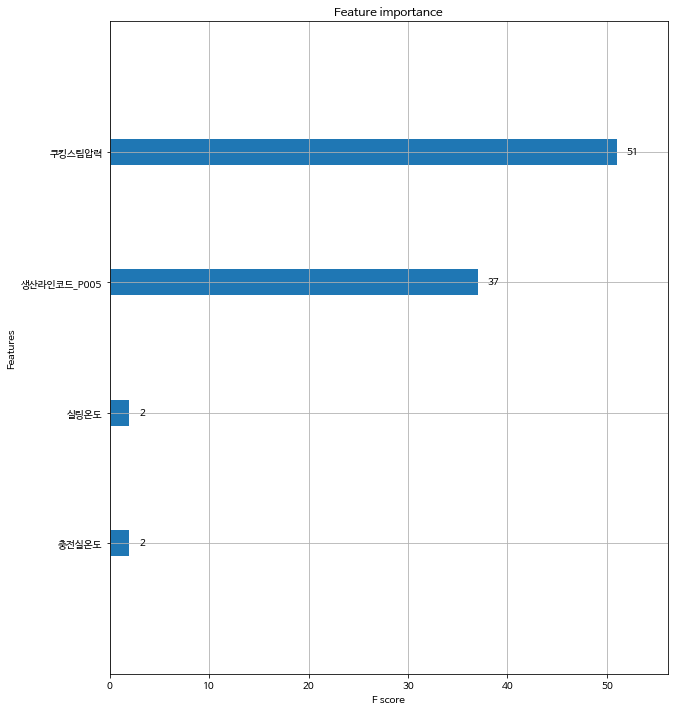

In [ ]:
## 변수중요도
fig,ax=plt.subplots(figsize=(10,12))
plot_importance(xgboost,ax=ax)


## lightGBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm=LGBMClassifier()

lgbm.fit(df_train_x,df_train_y)


LGBMClassifier()

In [ ]:
y_pred_lgb=lgbm.predict(df_test_x)

print("accuracy: ",accuracy_score(df_test_y,y_pred_lgb).round(3))
print("Confusion Matrix: \n",confusion_matrix(df_test_y,y_pred_lgb))

print(classification_report(df_test_y,y_pred_lgb))

accuracy:  1.0
Confusion Matrix: 
 [[6841    4]
 [   0 6895]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6845
           1       1.00      1.00      1.00      6895

    accuracy                           1.00     13740
   macro avg       1.00      1.00      1.00     13740
weighted avg       1.00      1.00      1.00     13740



NameError: ignored

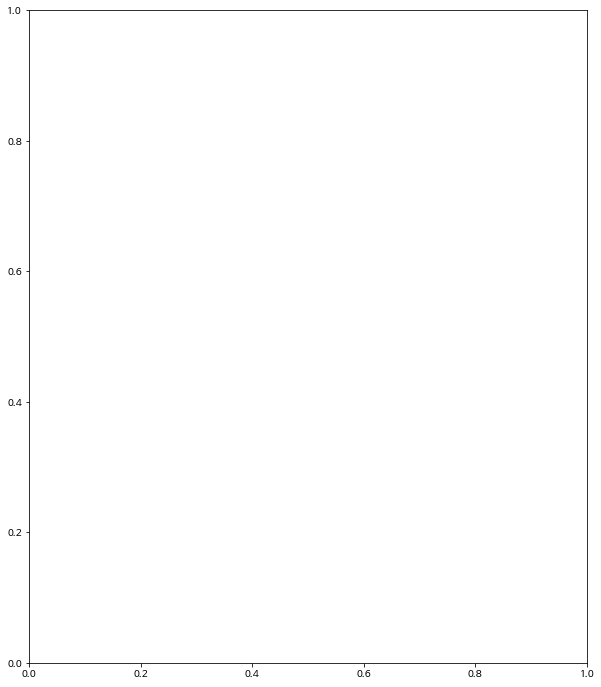

In [ ]:

## 변수중요도
fig,ax=plt.subplots(figsize=(10,12))
lightgbm.plot_importance(xgboost,ax=ax)